In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

# Progress bar
from tqdm.auto import trange, tqdm

In [2]:
import pynrc
from pynrc import nircam_dark

# Initialize SCA Dark

In [3]:
datadir='/Users/jarron/NIRCam/Data/CV3_Darks/'
outdir='/Users/jarron/NIRCam/dark_analysis/CV3/'
dark_data = nircam_dark(488, datadir, outdir)

[     pynrc:INFO] RAPID readout mode selected.
[     pynrc:INFO] Setting ngroup=108, nf=1, nd1=0, nd2=0, nd3=0.
[     pynrc:INFO] Initializing SCA 488/B3


In [4]:
# Dark ramp/slope info

# Get Super dark ramp (cube)
dark_data.get_super_dark_ramp()

# Calculate dark slope image
dark_data.get_dark_slope_image()
dark_data.get_super_bias_update()

# Calculate pixel slope averages
dark_data.get_pixel_slope_averages()

[     pynrc:INFO] Generating initial super bias
[     pynrc:INFO] Creating super dark ramp cube, updated super bias, and pixel mask info
[     pynrc:INFO] Calculating dark slope image...
[     pynrc:INFO] Opening updated super bias
[     pynrc:INFO] Calculating average pixel ramps...


In [5]:
# Calculate CDS Noise for various component 
# white noise, 1/f noise (correlated and independent), temporal and spatial
dark_data.get_cds_dict()

# Effective Noise
dark_data.get_effective_noise()

# Get kTC reset noise, IPC, and PPC values
dark_data.get_ktc_noise()

# Get the power spectrum information
# Saved to pow_spec_dict['freq', 'ps_all', 'ps_corr', 'ps_ucorr']
dark_data.get_power_spectrum(include_oh=False, calc_cds=True, mn_func=np.median, per_pixel=False)

[     pynrc:INFO] Building CDS Noise dictionaries...
[     pynrc:INFO]   Best fit excess variance model parameters: [  0.65496843 -10.7444632 ]
[     pynrc:INFO] Calculating kTC Noise for active and reference pixels...
[     pynrc:INFO] Building noise power spectrum dictionary...


In [6]:
# Calculate IPC/PPC kernels
dark_data.get_ipc(calc_ppc=True)
# Deconvolve the super dark and super bias images
dark_data.deconvolve_supers()

[     pynrc:INFO] Calculating IPC and PPC kernels...
[     pynrc:INFO]   IPC = 0.542% +/- 0.004%
[     pynrc:INFO]   PPC = 0.034% +/- 0.016%
[     pynrc:INFO] Deconvolving super dark and super bias images...


PPC Amps:   0%|          | 0/4 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

PPC Amps:   0%|          | 0/4 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# Get column variations
dark_data.get_column_variations()
# Create dictionary of reference pixel behavior
dark_data.get_ref_pixel_noise()

[     pynrc:INFO] Determining column variations (RTN)
[     pynrc:INFO] Determining reference pixel behavior
[     pynrc:INFO] RAPID readout mode selected.
[     pynrc:INFO] Setting ngroup=108, nf=1, nd1=0, nd2=0, nd3=0.
[     pynrc:INFO] Initializing SCA 488/B3


Files:   0%|          | 0/34 [00:00<?, ?it/s]

[     pynrc:INFO] Reference Pixels
[     pynrc:INFO] 
[     pynrc:INFO] Master Bias Mean
[     pynrc:INFO] 6567.215239293088
[     pynrc:INFO] Master Bias StDev
[     pynrc:INFO] 35.28866430537326
[     pynrc:INFO] Master Bias Frame-to-Frame StDev
[     pynrc:INFO] 19.02290341901411
[     pynrc:INFO] 
[     pynrc:INFO] Amp Offset Mean
[     pynrc:INFO] [ 1082.61303591   -95.48919031   574.23776101 -1063.07551813]
[     pynrc:INFO] Amp Offset StDev
[     pynrc:INFO] [4.94549738 2.68370034 3.313656   4.78157359]
[     pynrc:INFO] Amp Offset Frame-to-Frame StDev
[     pynrc:INFO] [11.96016872  6.35015397  6.46432936 10.7553785 ]
[     pynrc:INFO] 
[     pynrc:INFO] Even Columns Offset
[     pynrc:INFO] [394.9950279  339.7538986  817.46661859 304.05615088]
[     pynrc:INFO] Odd Columns Offset
[     pynrc:INFO] [-391.83707998 -336.13710167 -813.89624587 -301.68858982]
[     pynrc:INFO] 
[     pynrc:INFO] Reference Instability
[     pynrc:INFO] [1.26848983 1.33777294 1.3978342  1.27037272]


# Plot SCA Characteristics

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_dark_ramp_avg.pdf


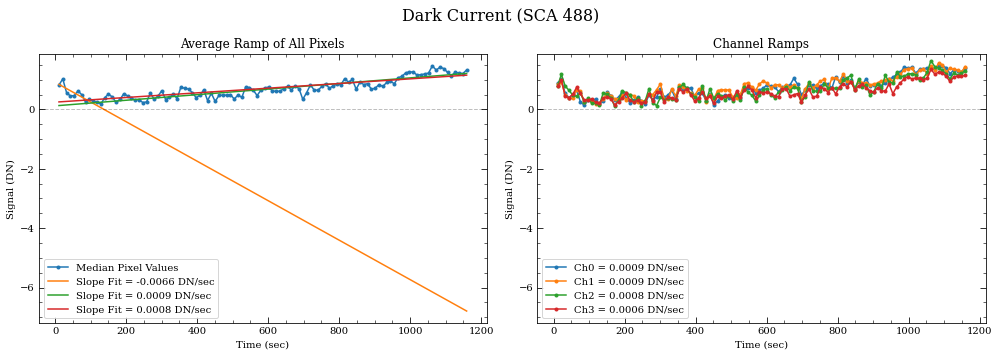

In [8]:
dark_data.plot_dark_ramps(save=True, time_cut=100)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_dark_ramp_chans.pdf


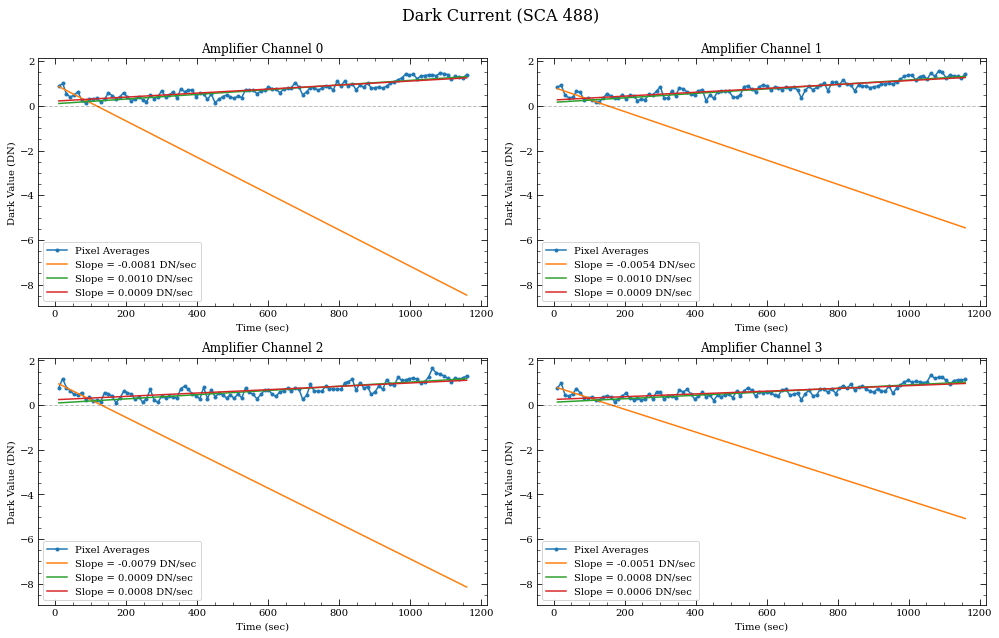

In [9]:
dark_data.plot_dark_ramps_ch(save=True, time_cut=100)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_bias_dark_images.pdf


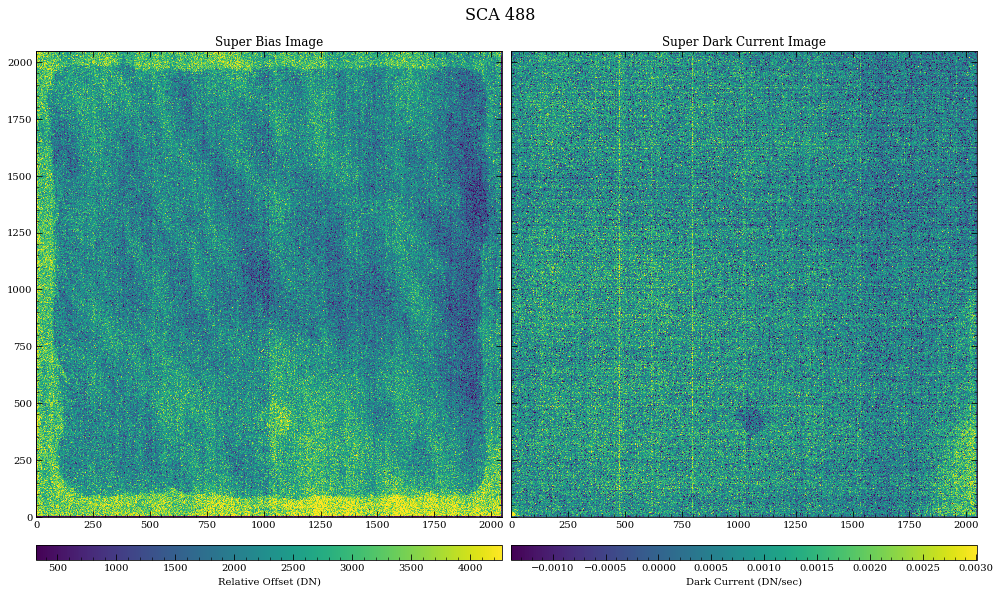

In [10]:
dark_data.plot_bias_darks(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_dark_histogram.pdf


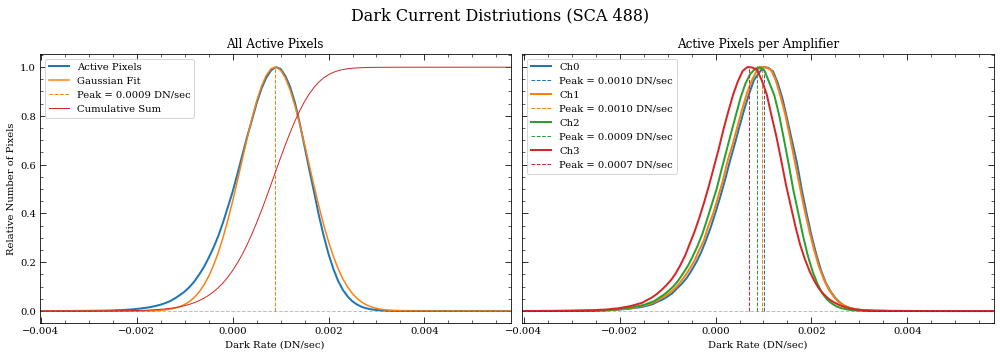

In [11]:
dark_data.plot_dark_distribution(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_dark_overview.pdf


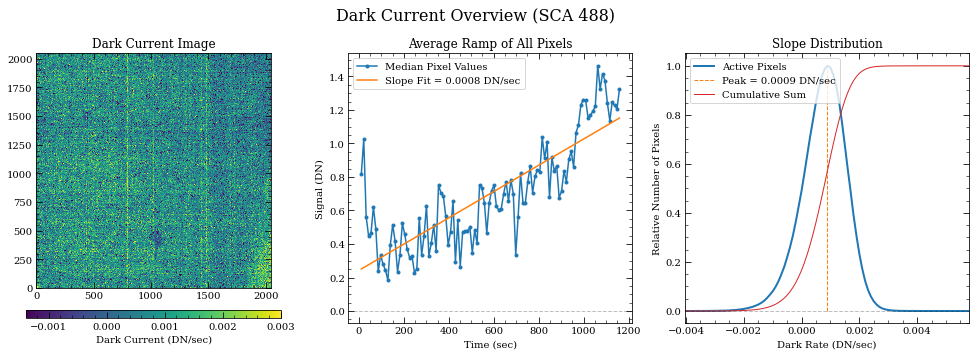

In [12]:
dark_data.plot_dark_overview(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_bias_overview.pdf


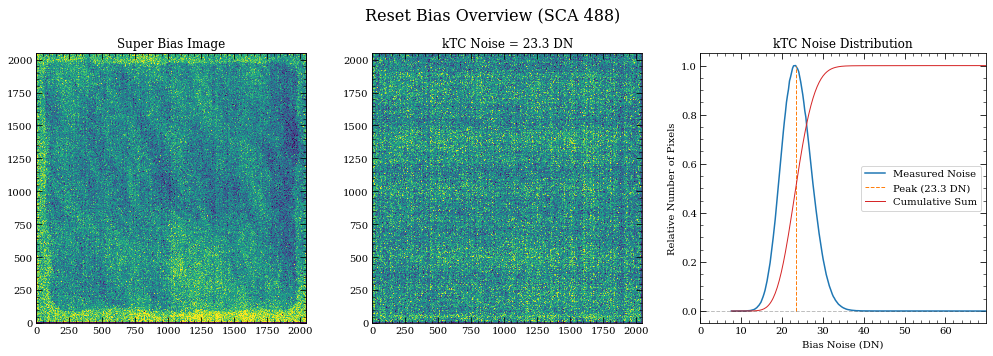

In [13]:
dark_data.plot_reset_overview(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_cds_noise.pdf


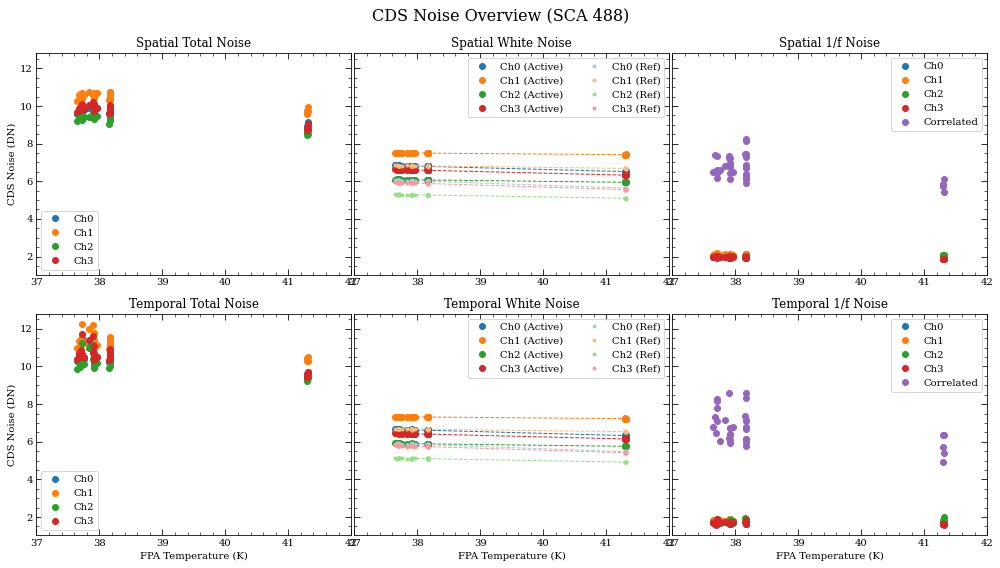

In [16]:
dark_data.plot_cds_noise(save=True, xlim=[37, 42])

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_eff_noise_patterns.pdf


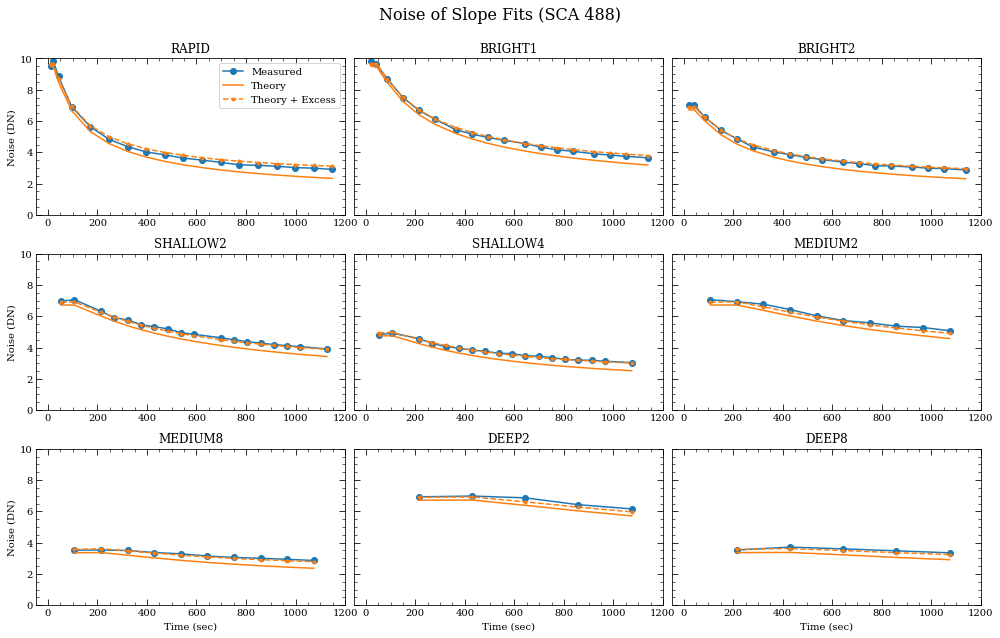

In [17]:
dark_data.plot_eff_noise_patterns(save=True, ylim=[0,10])

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_eff_noise.pdf


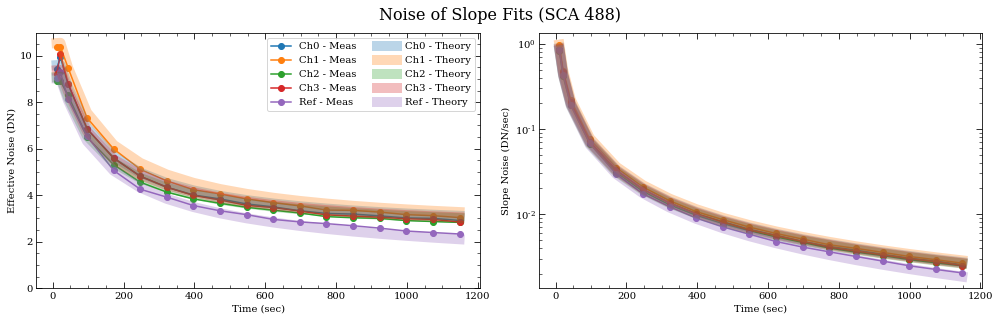

In [18]:
dark_data.plot_eff_noise(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_power_spectra.pdf


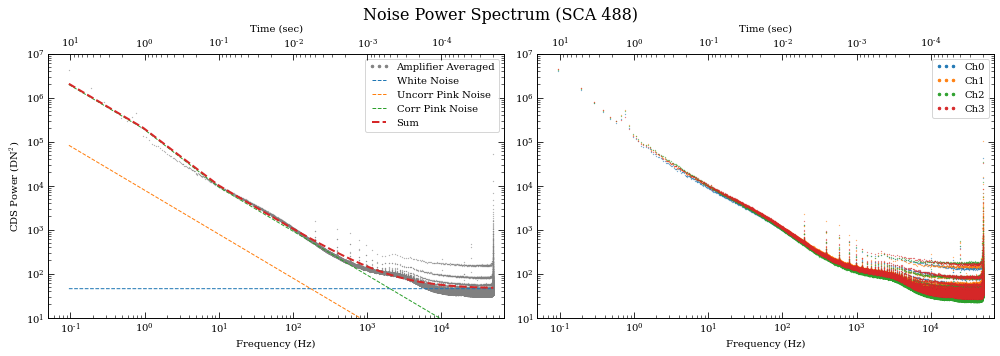

In [19]:
dark_data.plot_power_spectrum(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/488/FIGURES/488_pixel_kernels.pdf


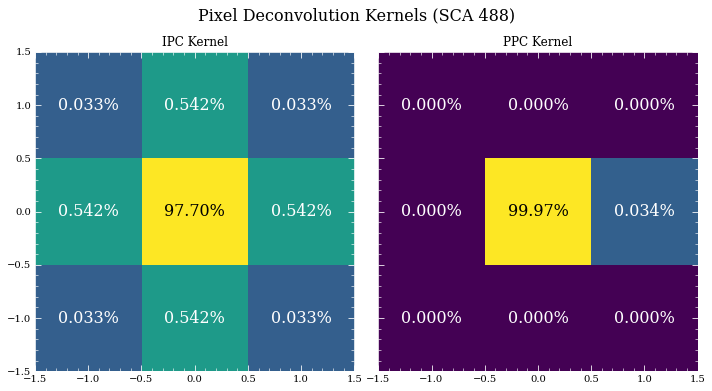

In [20]:
dark_data.plot_ipc_ppc(save=True)